* Steps for Case Study:

* Data Cleaning:
    *    Import Necessary Libraries
    *    Load the dataset & Dictionary
    *    Data Understanding {important}
    *    Problem Statement Understanding
    *    Missing Value Check
    *    Data Conversion
    *    Removing Outliers
* Analysis
    *    Univariate Analysis
    *    Bivariate Analysis
* Recommandations


# Loading Data & Data Dictionary

#### Data Loading

In [1]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Read the Csv file
df = pd.read_csv("loan.csv")
# Fetch the top 5 rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Loading Data Dictionary 

In [3]:
dictionary = pd.read_excel("./Data_Dictionary.xlsx")
dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


## Data Cleaning

#### Columns Review

In [4]:
df.shape

(39717, 111)

This Dataset contains total 111 columns and 39,717 rows

In [5]:
# Problem Statement: Analyse the data to find the Variables/Factors affecting leading to loan defaulters.
df.info(verbose="true")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

#### Dropping Rows

In [6]:
# Dropping all the rows where loan status is Current
# These loans will not contribute into in the decisions (Pass or fail) as they are still in progress
print(
    "Number of rows where loan status is Current",
    len(df[df["loan_status"] == "Current"]),
)
df = df[df["loan_status"] != "Current"]

Number of rows where loan status is Current 1140


In [7]:
# Dropping all rows which are duplicate
df.duplicated().sum()

# There are no duplicate rows

0

In [8]:
print("Final shape of the data after dropping rows", df.shape)

Final shape of the data after dropping rows (38577, 111)


#### Dropping Columns

**Missing Value Check**

In [9]:
# identify the columns which have all NAs
na_col_list = df.columns[df.isna().all()]
print("Columns with 100% missing Value:", list(na_col_list))
print("Total number of columns with 100% missing Value:", len(na_col_list))

# removing the columns with 100% missing data
df.drop(na_col_list, axis=1, inplace=True)

Columns with 100% missing Value: ['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_e

In [10]:
# Identifying all the columns which contains all unique values
unique_cols = df.columns[df.nunique() == len(df)]
print("Columns with 100% unique Values:", list(unique_cols))

# removing the columns with 100% unique values
df.drop(unique_cols, axis=1, inplace=True)

Columns with 100% unique Values: ['id', 'member_id', 'url']


In [11]:
# Removing the description and title columns as they don't contribute into the analysis
df.drop(["emp_title", "desc", "title"], axis=1, inplace=True)

In [12]:
# Identifying all the columns which contains constant value
constant_cols = df.columns[df.nunique() == 1]
print("Columns with constant Values:", list(constant_cols))

# removing the columns with constant value
df.drop(constant_cols, axis=1, inplace=True)

Columns with constant Values: ['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [13]:
# identify the columns which have more than 60% missing values
na_col_list = df.columns[df.isna().mean() >= 0.60]
print("Columns with more than 60% missing Value:", list(na_col_list))

# removing the columns with more than 60% missing data
df.drop(na_col_list, axis=1, inplace=True)

Columns with more than 60% missing Value: ['mths_since_last_delinq', 'mths_since_last_record']


In [14]:
print("Final Shape of the Dataset", df.shape)

Final Shape of the Dataset (38577, 37)


#### Data Conversion

In [15]:
# Keeping only month values and converting to integer
df["term"] = df["term"].apply(lambda x: x.split(" ")[1]).astype("int")

In [16]:
# Removing % sign from interest rate
df["int_rate"] = (
    df["int_rate"].apply(lambda x: x.replace("%", "")).astype("float64")
)

In [17]:
# Converting the column issue_d from string object to DateTime
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%y")
# creating month and year columns
df["issue_year"] = df["issue_d"].dt.year
df["issue_month"] = df["issue_d"].dt.month
df["issue_quarter"] = df["issue_d"].dt.quarter

In [18]:
# Converting emp_length to integer values
# Converting emp_length as numerical data
df["emp_length"] = df["emp_length"].replace(
    {
        "< 1 year": 0,
        "2 years": 2,
        "3 years": 3,
        "7 years": 7,
        "4 years": 4,
        "5 years": 5,
        "1 year": 1,
        "6 years": 6,
        "8 years": 8,
        "9 years": 9,
        "10+ years": 10,
    }
)

In [19]:
# Removing rows/columns with NAN
df.drop(["revol_util", "last_pymnt_d"], axis=1, inplace=True)
df = df[df["emp_length"].notna()]
df = df[df["pub_rec_bankruptcies"].notna()]

In [20]:
df[
    [
        "loan_amnt",
        "funded_amnt",
        "funded_amnt_inv",
        "annual_inc",
        "int_rate",
        "dti",
    ]
].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,int_rate,dti
count,36847.000000,36847.000000,36847.000000,3.684700e+04,36847.000000,36847.000000
mean,11141.327652,10872.924526,10430.400856,6.940448e+04,11.988346,13.330449
std,7369.988994,7109.330771,7008.919431,6.402747e+04,3.702091,6.651565
min,500.000000,500.000000,0.000000,4.000000e+03,5.420000,0.000000
25%,5500.000000,5400.000000,5000.000000,4.100400e+04,8.940000,8.210000
50%,10000.000000,9600.000000,9000.000000,6.000000e+04,11.860000,13.420000
75%,15000.000000,15000.000000,14335.044685,8.300000e+04,14.520000,18.590000
max,35000.000000,35000.000000,35000.000000,6.000000e+06,24.400000,29.990000


In [21]:
# COnverting amounts columns to different buckets for easy analysis
bins = [-float("inf"), 5000, 10000, 15000, float("inf")]
labels = ["0 - 5K", "5K - 10K", "10K - 15K", "15K - above"]
df["loan_amnt_buckets"] = pd.cut(df["loan_amnt"], bins=bins, labels=labels)
df["funded_amnt_buckets"] = pd.cut(df["funded_amnt"], bins=bins, labels=labels)
df["funded_amnt_inv_buckets"] = pd.cut(
    df["funded_amnt_inv"], bins=bins, labels=labels
)

In [22]:
# converting interest rates to buckets
bins = [-float("inf"), 9, 11, 13, 15, float("inf")]
labels = ["Very Low", "Low", "Medium", "High", "Very High"]
df["int_rate_buckets"] = pd.cut(df["int_rate"], bins=bins, labels=labels)

In [23]:
# Bucketing DTI Column
bins = [-float("inf"), 8, 12, 16, 20, float("inf")]
labels = ["Very Low", "Low", "Medium", "High", "Very High"]

df["dti_buckets"] = pd.cut(df["dti"], bins=bins, labels=labels)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36847 non-null  int64         
 1   funded_amnt              36847 non-null  int64         
 2   funded_amnt_inv          36847 non-null  float64       
 3   term                     36847 non-null  int32         
 4   int_rate                 36847 non-null  float64       
 5   installment              36847 non-null  float64       
 6   grade                    36847 non-null  object        
 7   sub_grade                36847 non-null  object        
 8   emp_length               36847 non-null  float64       
 9   home_ownership           36847 non-null  object        
 10  annual_inc               36847 non-null  float64       
 11  verification_status      36847 non-null  object        
 12  issue_d                  36847 non-nu

In [25]:
df.shape

(36847, 43)

## Univariate Analysis

#### Removing Outliers

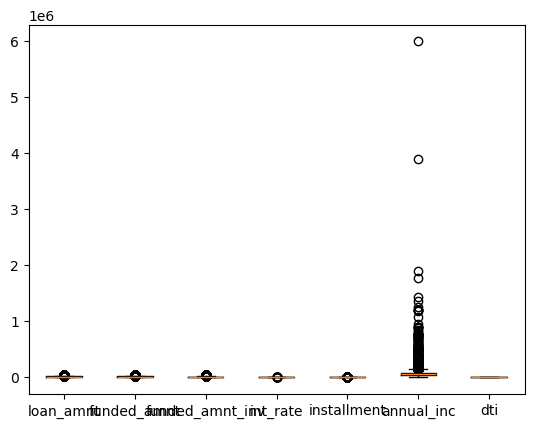

In [26]:
plt.boxplot(
    df[
        [
            "loan_amnt",
            "funded_amnt",
            "funded_amnt_inv",
            "int_rate",
            "installment",
            "annual_inc",
            "dti",
        ]
    ],
    labels=[
        "loan_amnt",
        "funded_amnt",
        "funded_amnt_inv",
        "int_rate",
        "installment",
        "annual_inc",
        "dti",
    ],
)


plt.show()

In [27]:
def remove_outliers(df, column_name):
    """
    Removes outliers from a specified column in a DataFrame using the IQR method.

    """
    # Calculate Q1 (25th percentile), Q3 (75th percentile) and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_no_outliers = df[
        (df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)
    ]

    return df_no_outliers

In [28]:
# Removinf Outlier from columns
for col in [
    "loan_amnt",
    "funded_amnt",
    "funded_amnt_inv",
    "int_rate",
    "installment",
    "annual_inc",
    "dti",
]:
    df = remove_outliers(df.copy(), col)

#### Plots and Insights

In [29]:
def dist_box_plot(df, column):
    fig, p = plt.subplots(1, 2, figsize=(16, 4))
    sns.distplot(
        df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0]
    )
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column)
    p[1].set_xlabel(column)
    plt.tight_layout()
    plt.show()

##### Loan amount

By boxplot, we can see that majority of the loan amount is in between 5k to 14k

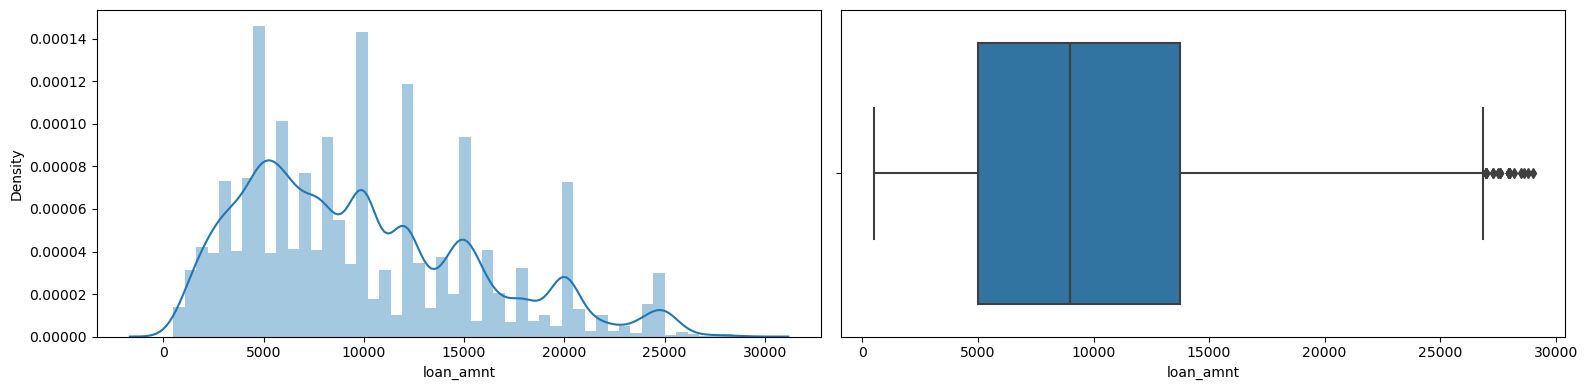

In [64]:
dist_box_plot(df, "loan_amnt")

##### Funded Amount

Majority of the amount is in between 5k to 13k

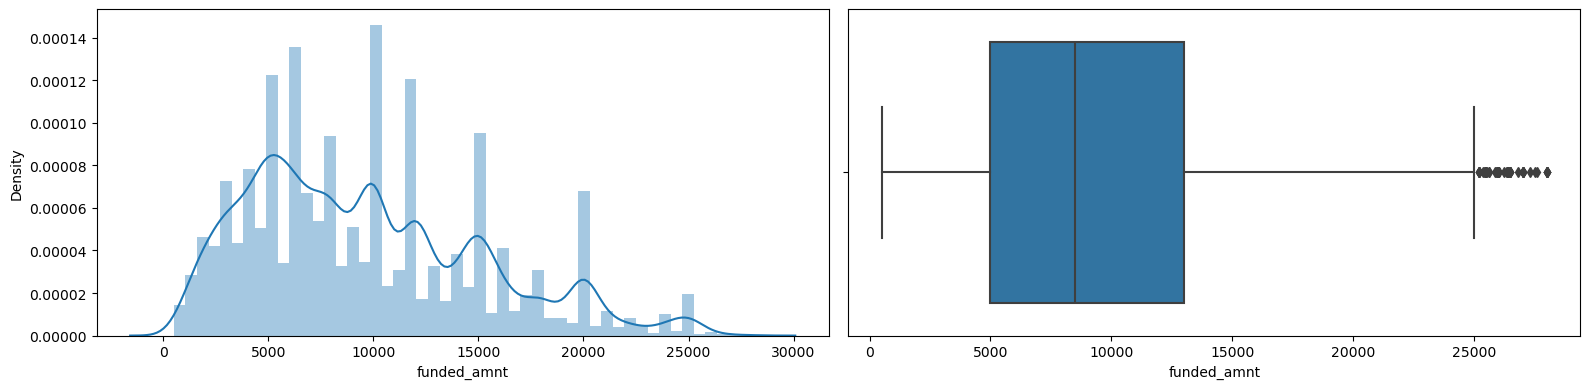

In [31]:
dist_box_plot(df, "funded_amnt")

##### Interest Rate and Installment

Interest rate is starting from 5% and going till 22% where major part of it is in 8.5% to 14.5%

Installment are going from 20 to 800, but majority lies in between 160 to 400

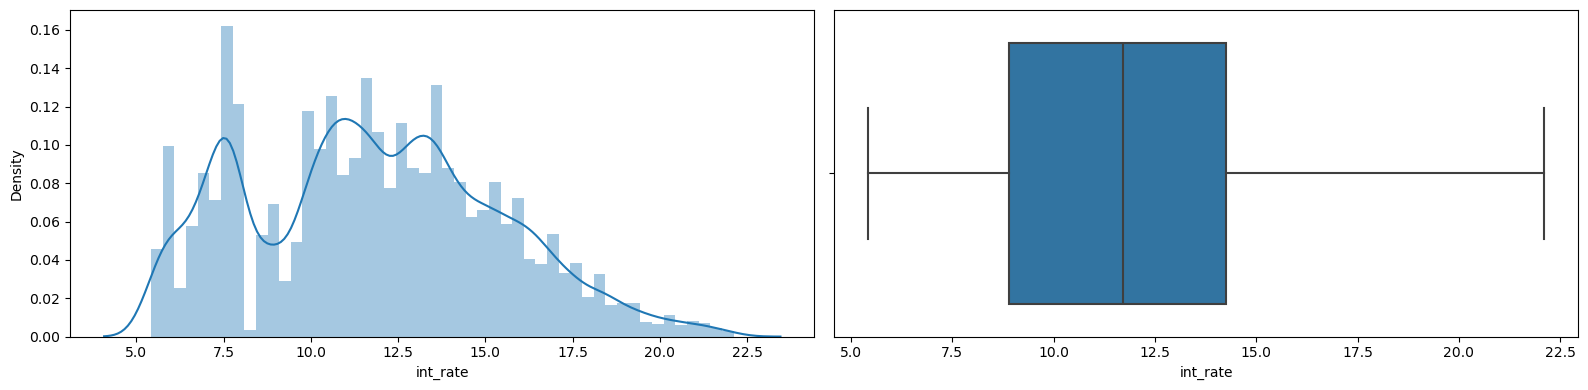

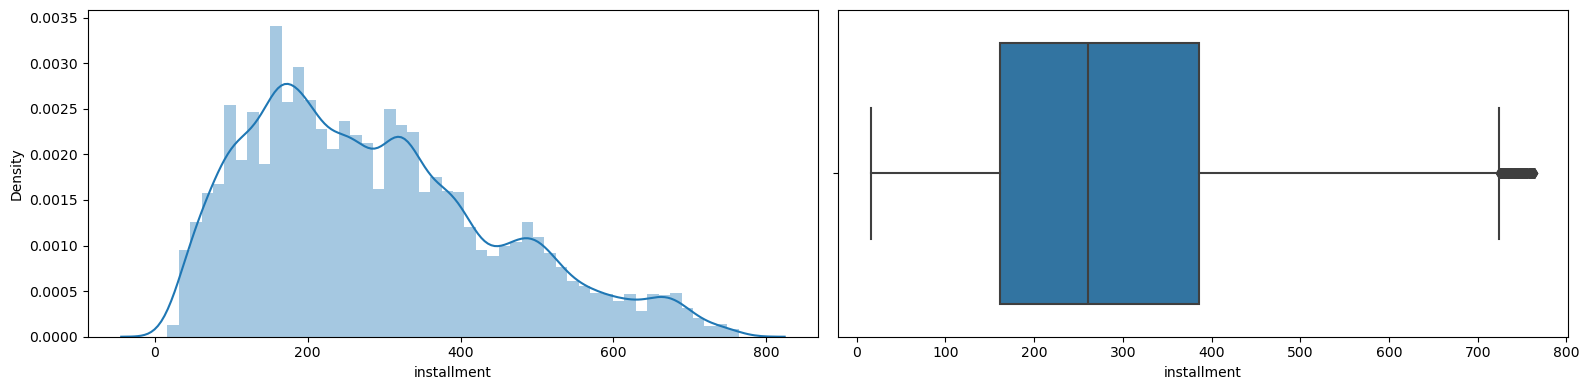

In [32]:
dist_box_plot(df, "int_rate")
dist_box_plot(df, "installment")

##### DTI

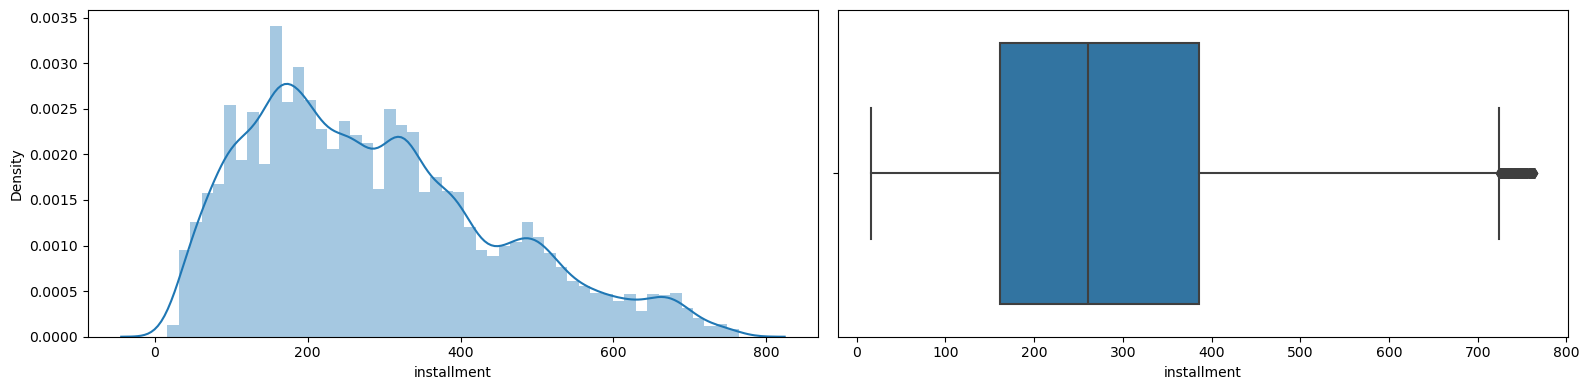

In [33]:
dist_box_plot(df, "dti")

##### Purpose

<Axes: xlabel='purpose'>

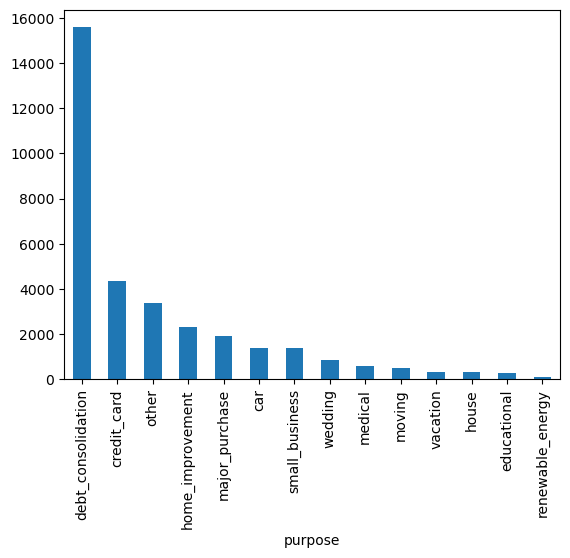

In [34]:
df["purpose"].value_counts().plot.bar()
# Majority of the applications are for debt_consolidation

##### Address State

<Axes: xlabel='addr_state'>

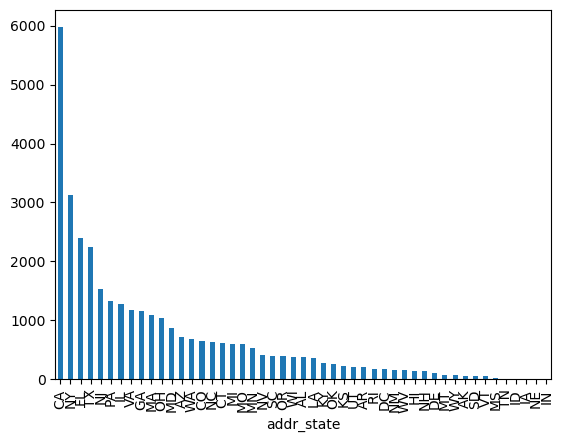

In [35]:
df["addr_state"].value_counts().plot.bar()
# Ca have most number of applications

##### Home Ownership

<Axes: xlabel='home_ownership'>

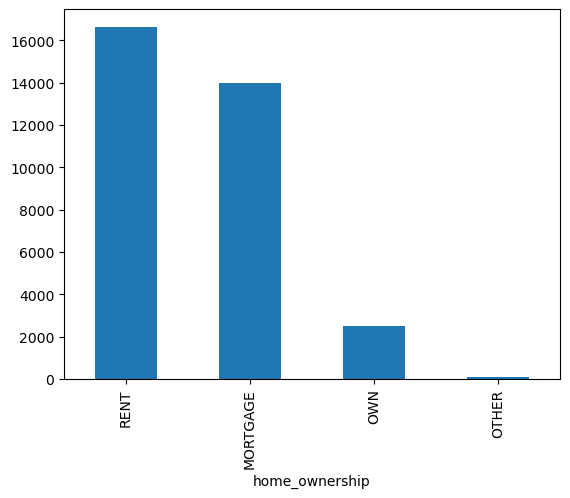

In [36]:
df["home_ownership"].value_counts().plot.bar()
# Most of the people are either on rent or on mortgage

##### Term

<Axes: xlabel='term'>

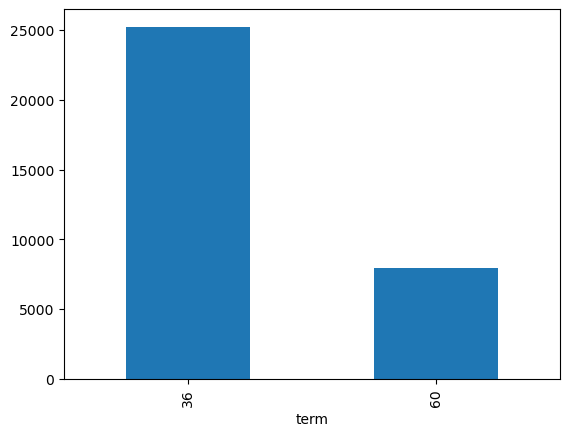

In [37]:
df["term"].value_counts().plot.bar()
# Around 60% of the people take loan for 36 months

##### Grade

<Axes: xlabel='grade'>

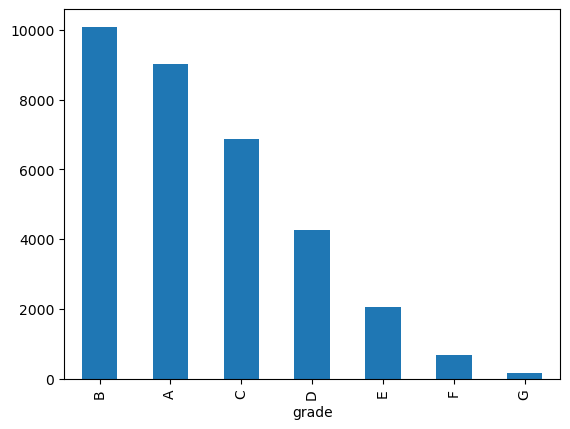

In [38]:
df["grade"].value_counts().plot.bar()
# Majority of the loan application are under Grade B

##### Employment Length

<Axes: xlabel='emp_length'>

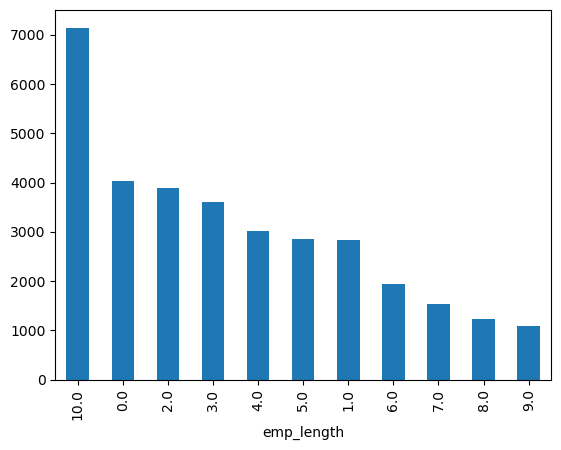

In [39]:
df["emp_length"].value_counts().plot.bar()
# Majority of the employement length is 10+ years

##### Rate of Bankruptcies

<Axes: xlabel='pub_rec_bankruptcies'>

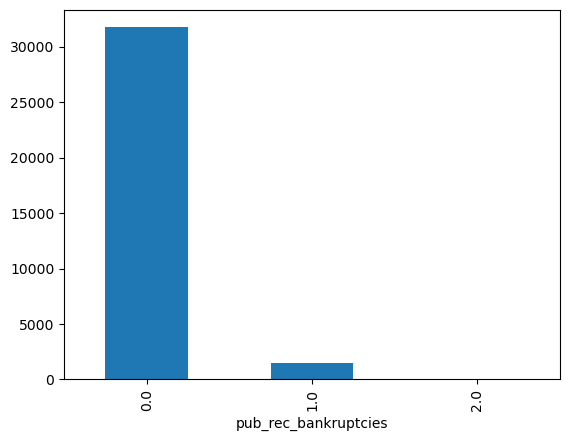

In [40]:
df["pub_rec_bankruptcies"].value_counts().plot.bar()
# Majority of the people are not bankrupt

##### Year

<Axes: xlabel='issue_year'>

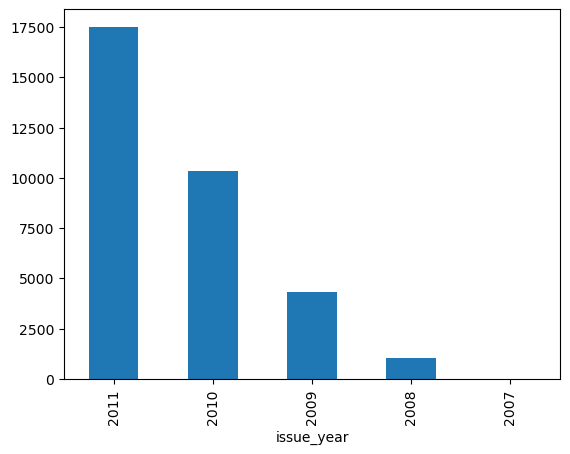

In [41]:
df["issue_year"].value_counts().plot.bar()
# Loan applications are increasing every year

##### Month

<Axes: xlabel='issue_month'>

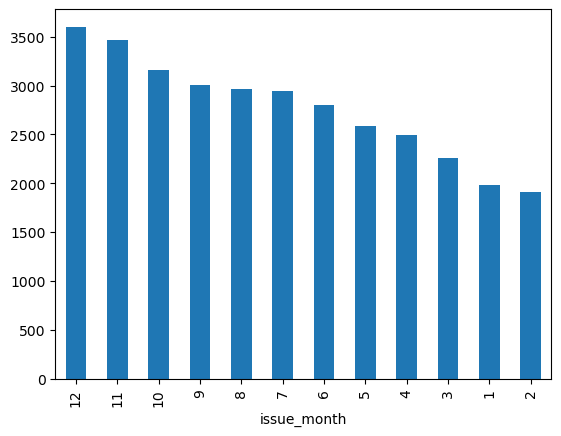

In [42]:
df["issue_month"].value_counts().plot.bar()
# people apply more towards the year end for loan

##### Loan Amount

<Axes: xlabel='loan_amnt_buckets'>

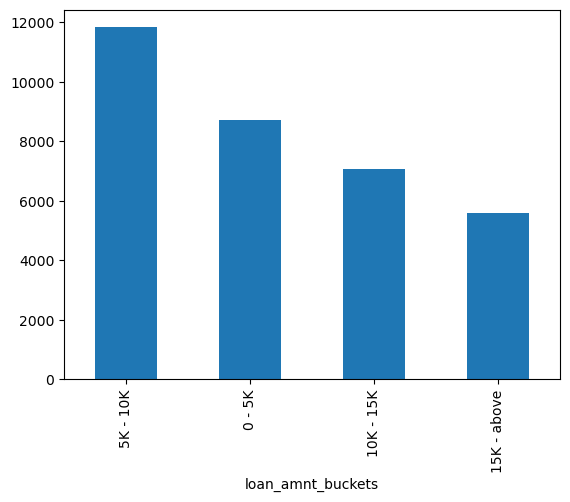

In [43]:
df["loan_amnt_buckets"].value_counts().plot.bar()
# Most of the loan are of below 10K

<Axes: xlabel='funded_amnt_buckets'>

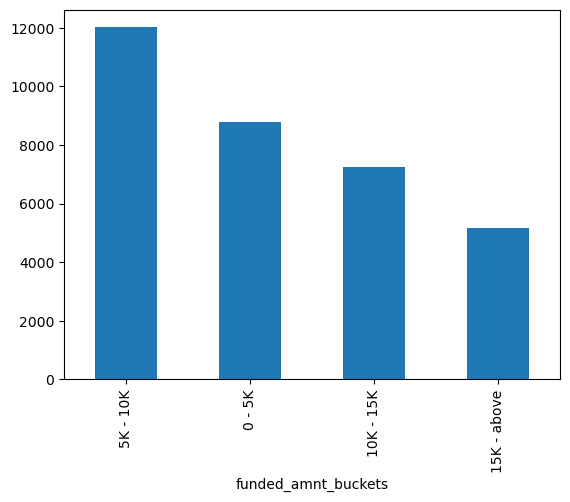

In [44]:
df["funded_amnt_buckets"].value_counts().plot.bar()

<Axes: xlabel='funded_amnt_inv_buckets'>

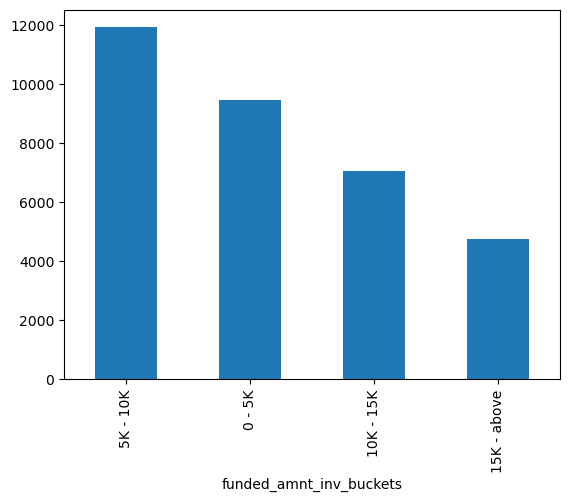

In [45]:
df["funded_amnt_inv_buckets"].value_counts().plot.bar()

Same trend of loan amount can be seen in funded amount and funded amount inv
lets see the correlation 

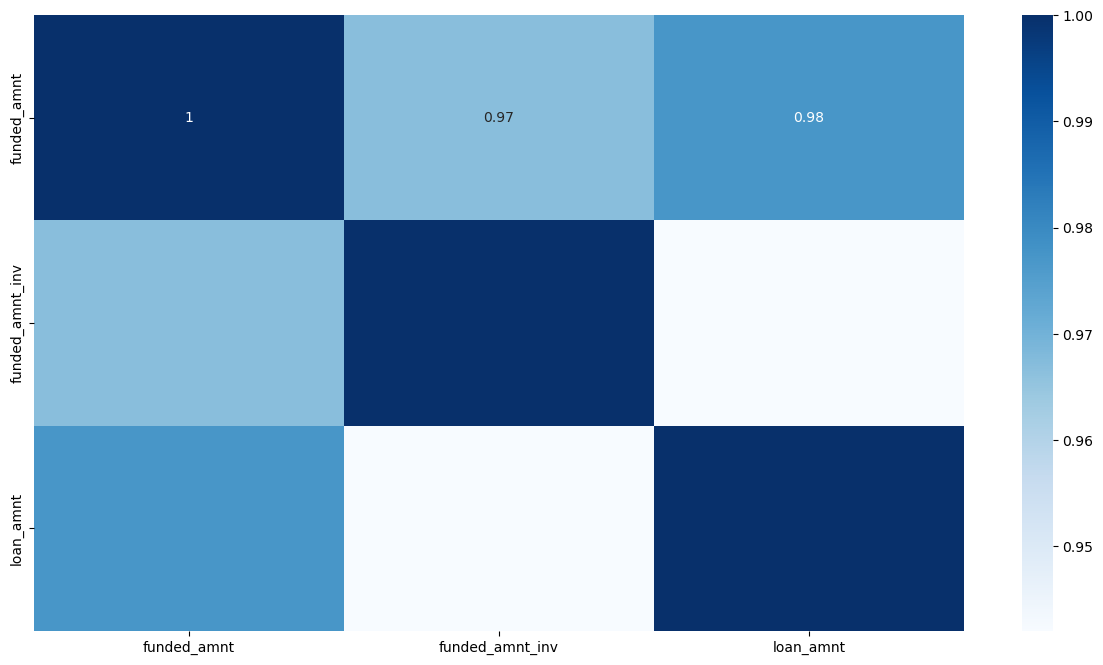

In [46]:
# Identifying key correlations
corr = df.loc[:, ["funded_amnt", "funded_amnt_inv", "loan_amnt"]].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

All three columns are highly correlated, dropping funded columns

In [47]:
# Dropping funded_amnt and funded_amnt_inv
df.drop(["funded_amnt_inv", "funded_amnt"], axis=1, inplace=True)

##### Annual Income

<Axes: xlabel='annual_inc_buckets'>

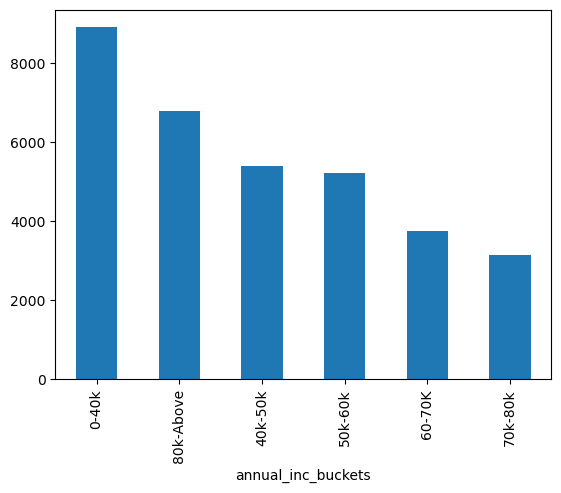

In [48]:
# Bucketing Annual Income Column
bins = [-float("inf"), 40000, 50000, 60000, 70000, 80000, float("inf")]
labels = ["0-40k", "40k-50k", "50k-60k", "60-70K", "70k-80k", "80k-Above"]

df["annual_inc_buckets"] = pd.cut(df["annual_inc"], bins=bins, labels=labels)
df["annual_inc_buckets"].value_counts().plot.bar()
# Most loan applicant have salary of 40k or below 40k

##### Interest Rate

<Axes: xlabel='int_rate_buckets'>

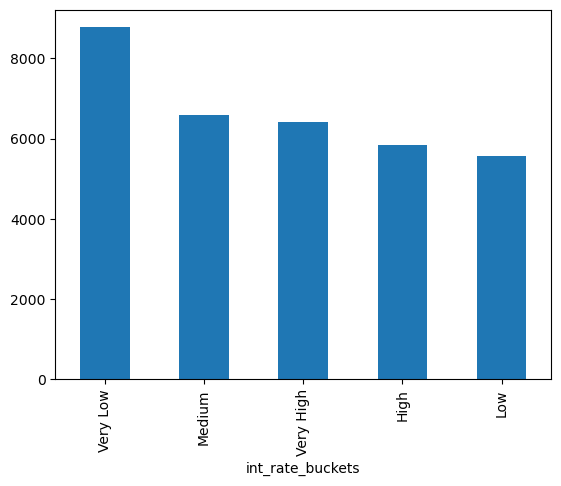

In [49]:
df["int_rate_buckets"].value_counts().plot.bar()
# Most loan application are on very low interest rate

## Bivariate Analysis

##### Important Functions

In [50]:
def get_barplot_data(data, colum_name):
    plt_data = (
        data.groupby([colum_name, "loan_status"])
        .size()
        .to_frame("Count")
        .reset_index()
    )
    # Calculate the total counts for each installment bucket
    total_counts = plt_data.groupby(colum_name)["Count"].sum().reset_index()
    total_counts.columns = [colum_name, "Total_Count"]

    # Merge total counts back to the original dataframe
    plt_data = pd.merge(plt_data, total_counts, on=colum_name)

    # Calculate the percentage
    plt_data["Percentage"] = (
        plt_data["Count"] / plt_data["Total_Count"]
    ) * 100

    return plt_data


def add_annotate(plot):
    for p in plot.patches:
        plot.annotate(
            format(p.get_height(), ".2f"),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 9),
            textcoords="offset points",
        )
    return plot

##### Loan Status

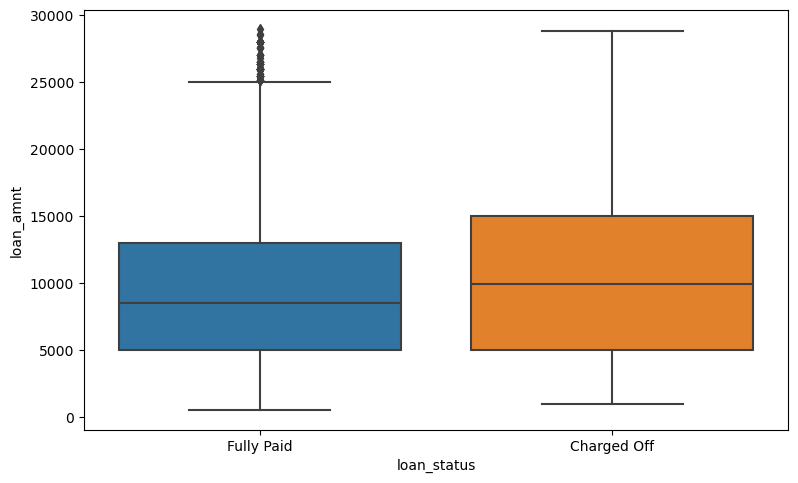

In [51]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x="loan_status", y="loan_amnt", data=df)
plt.show()

Above plot shows that if the amount is high, it is more likely to be charged off

##### Loan Amount

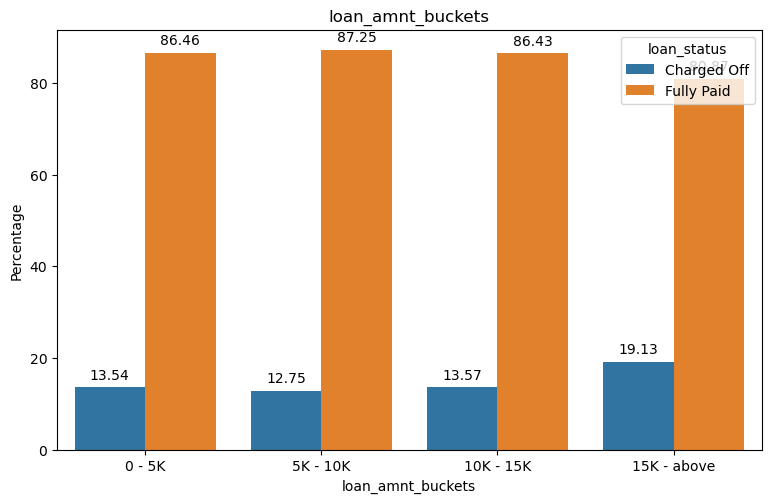

,loan_amnt_buckets,loan_status,Count,Total_Count,Percentage
0,0 - 5K,Charged Off,1180,8713,13.542982
1,0 - 5K,Fully Paid,7533,8713,86.457018
2,5K - 10K,Charged Off,1508,11832,12.745098
3,5K - 10K,Fully Paid,10324,11832,87.254902
4,10K - 15K,Charged Off,959,7069,13.566275
5,10K - 15K,Fully Paid,6110,7069,86.433725
6,15K - above,Charged Off,1067,5577,19.132150
7,15K - above,Fully Paid,4510,5577,80.867850


In [52]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt_data = get_barplot_data(df, "loan_amnt_buckets")
barplot = sns.barplot(
    x="loan_amnt_buckets", y="Percentage", data=plt_data, hue="loan_status"
)
barplot = add_annotate(barplot)
plt.title("loan_amnt_buckets")
plt.show()
plt_data

Above plot shows that if the amount is high, it is more likely to be charged off

##### Interest Rate

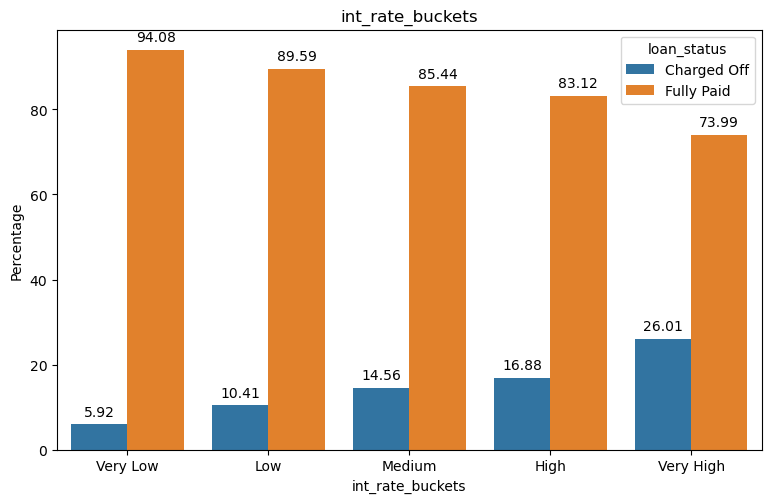

,int_rate_buckets,loan_status,Count,Total_Count,Percentage
0,Very Low,Charged Off,519,8773,5.915878
1,Very Low,Fully Paid,8254,8773,94.084122
2,Low,Charged Off,579,5562,10.409924
3,Low,Fully Paid,4983,5562,89.590076
4,Medium,Charged Off,961,6599,14.562813
5,Medium,Fully Paid,5638,6599,85.437187
6,High,Charged Off,985,5836,16.877999
7,High,Fully Paid,4851,5836,83.122001
8,Very High,Charged Off,1670,6421,26.008410
9,Very High,Fully Paid,4751,6421,73.991590


In [53]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt_data = get_barplot_data(df, "int_rate_buckets")
barplot = sns.barplot(
    x="int_rate_buckets", y="Percentage", data=plt_data, hue="loan_status"
)
barplot = add_annotate(barplot)
plt.title("int_rate_buckets")
plt.show()
plt_data

above plot shows that there is a high chance of the loan to get default if the interest rate is higher

##### Installment

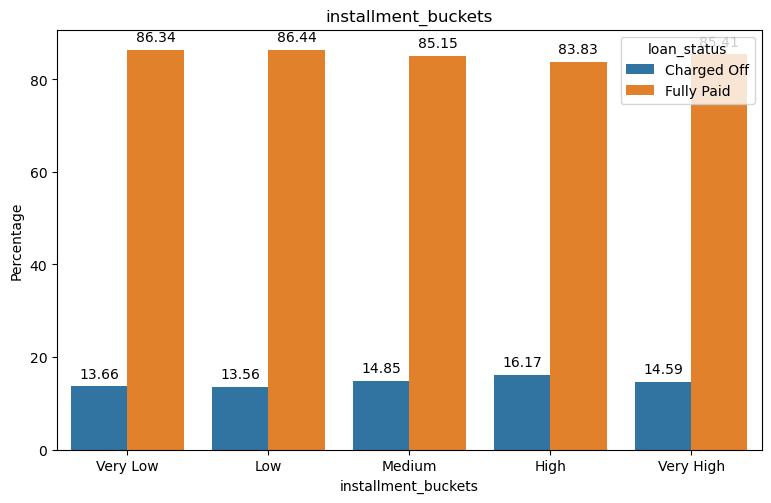

,installment_buckets,loan_status,Count,Total_Count,Percentage
0,Very Low,Charged Off,1122,8211,13.664596
1,Very Low,Fully Paid,7089,8211,86.335404
2,Low,Charged Off,1702,12551,13.560672
3,Low,Fully Paid,10849,12551,86.439328
4,Medium,Charged Off,1141,7683,14.850970
5,Medium,Fully Paid,6542,7683,85.149030
6,High,Charged Off,579,3581,16.168668
7,High,Fully Paid,3002,3581,83.831332
8,Very High,Charged Off,170,1165,14.592275
9,Very High,Fully Paid,995,1165,85.407725


In [54]:
# Bucketing installment Column
bins = [-float("inf"), 160, 320, 480, 640, float("inf")]
labels = ["Very Low", "Low", "Medium", "High", "Very High"]
df["installment_buckets"] = pd.cut(df["installment"], bins=bins, labels=labels)

plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt_data = get_barplot_data(df, "installment_buckets")
barplot = sns.barplot(
    x="installment_buckets", y="Percentage", data=plt_data, hue="loan_status"
)
barplot = add_annotate(barplot)
plt.title("installment_buckets")
plt.show()
plt_data

High installments can be lead to more loan defaults

##### Annual Income

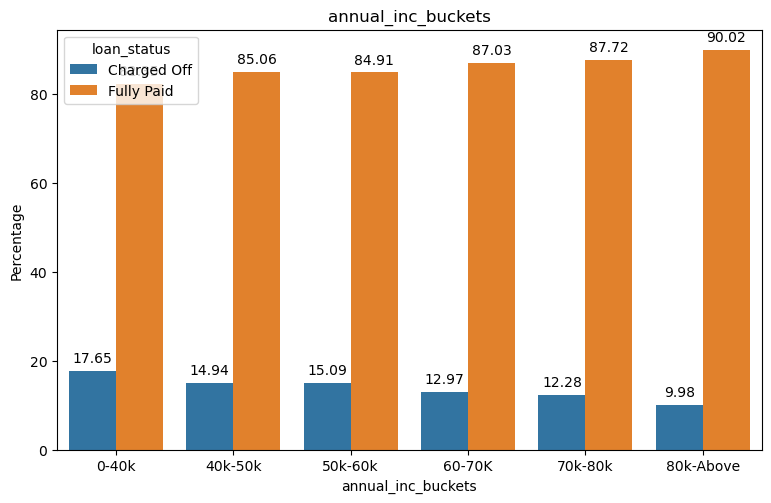

,annual_inc_buckets,loan_status,Count,Total_Count,Percentage
0,0-40k,Charged Off,1570,8896,17.648381
1,0-40k,Fully Paid,7326,8896,82.351619
2,40k-50k,Charged Off,807,5400,14.944444
3,40k-50k,Fully Paid,4593,5400,85.055556
4,50k-60k,Charged Off,788,5223,15.087115
5,50k-60k,Fully Paid,4435,5223,84.912885
6,60-70K,Charged Off,486,3747,12.970376
7,60-70K,Fully Paid,3261,3747,87.029624
8,70k-80k,Charged Off,385,3134,12.284620
9,70k-80k,Fully Paid,2749,3134,87.715380


In [55]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt_data = get_barplot_data(df, "annual_inc_buckets")
barplot = sns.barplot(
    x="annual_inc_buckets", y="Percentage", data=plt_data, hue="loan_status"
)
barplot = add_annotate(barplot)
plt.title("annual_inc_buckets")
plt.show()
plt_data

Higher annual income tends to less loan defaults

##### DTI

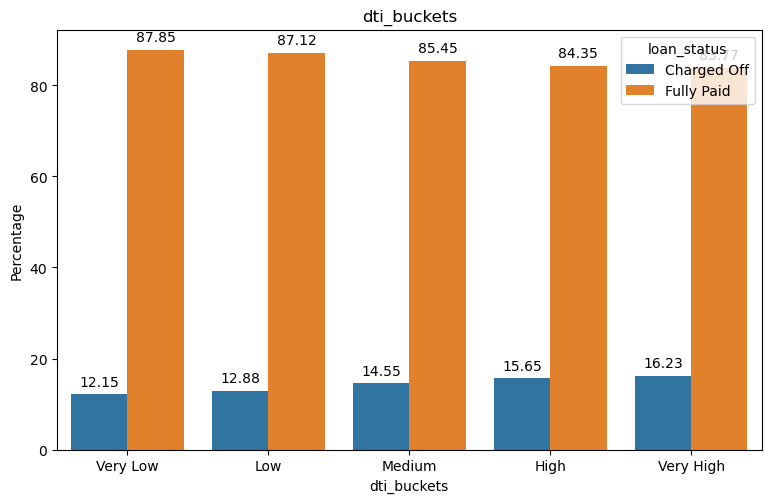

,dti_buckets,loan_status,Count,Total_Count,Percentage
0,Very Low,Charged Off,948,7803,12.149173
1,Very Low,Fully Paid,6855,7803,87.850827
2,Low,Charged Off,789,6128,12.875326
3,Low,Fully Paid,5339,6128,87.124674
4,Medium,Charged Off,985,6770,14.549483
5,Medium,Fully Paid,5785,6770,85.450517
6,High,Charged Off,948,6059,15.646146
7,High,Fully Paid,5111,6059,84.353854
8,Very High,Charged Off,1044,6431,16.233867
9,Very High,Fully Paid,5387,6431,83.766133


In [56]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt_data = get_barplot_data(df, "dti_buckets")
barplot = sns.barplot(
    x="dti_buckets", y="Percentage", data=plt_data, hue="loan_status"
)
barplot = add_annotate(barplot)
plt.title("dti_buckets")
plt.show()
plt_data

Higher debt to income ratio can lead to higher loan defaults

##### Term

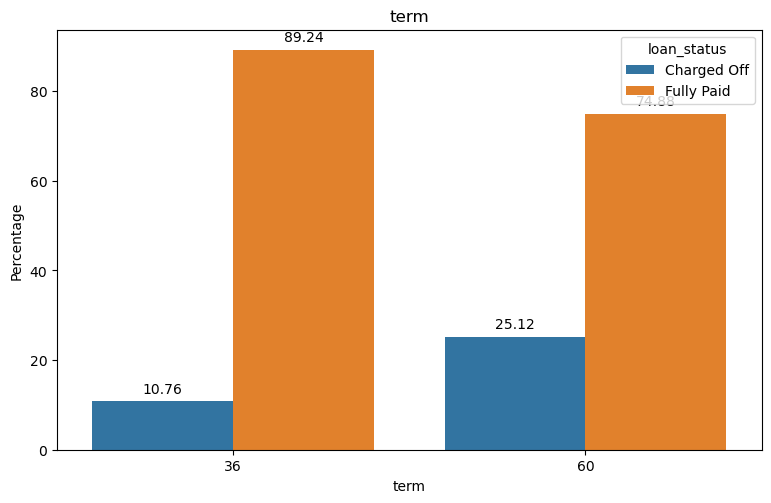

,term,loan_status,Count,Total_Count,Percentage
0,36,Charged Off,2715,25234,10.759293
1,36,Fully Paid,22519,25234,89.240707
2,60,Charged Off,1999,7957,25.122534
3,60,Fully Paid,5958,7957,74.877466


In [57]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt_data = get_barplot_data(df, "term")
barplot = sns.barplot(
    x="term", y="Percentage", data=plt_data, hue="loan_status"
)
barplot = add_annotate(barplot)
plt.title("term")
plt.show()
plt_data

5 years loan duration have higher rate of defaults

##### Grade

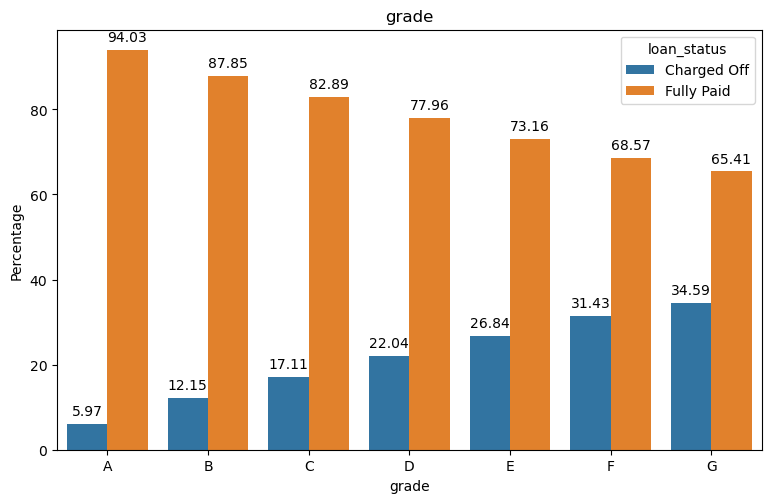

,grade,loan_status,Count,Total_Count,Percentage
0,A,Charged Off,539,9026,5.971637
1,A,Fully Paid,8487,9026,94.028363
2,B,Charged Off,1225,10082,12.150367
3,B,Fully Paid,8857,10082,87.849633
4,C,Charged Off,1177,6879,17.110045
5,C,Fully Paid,5702,6879,82.889955
6,D,Charged Off,941,4270,22.037471
7,D,Fully Paid,3329,4270,77.962529
8,E,Charged Off,557,2075,26.843373
9,E,Fully Paid,1518,2075,73.156627


In [58]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt_data = get_barplot_data(df, "grade")
barplot = sns.barplot(
    x="grade", y="Percentage", data=plt_data, hue="loan_status"
)
barplot = add_annotate(barplot)
plt.title("grade")
plt.show()
plt_data

We can see that loan grades having highest default percentages. Higher Grade have very high default rate

##### Emp Length

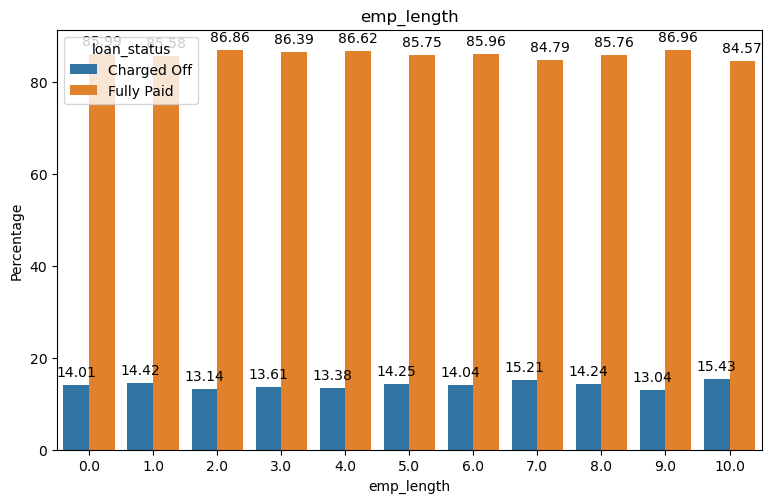

,emp_length,loan_status,Count,Total_Count,Percentage
0,0.0,Charged Off,566,4040,14.009901
1,0.0,Fully Paid,3474,4040,85.990099
2,1.0,Charged Off,410,2843,14.421386
3,1.0,Fully Paid,2433,2843,85.578614
4,2.0,Charged Off,510,3882,13.137558
5,2.0,Fully Paid,3372,3882,86.862442
6,3.0,Charged Off,492,3615,13.609959
7,3.0,Fully Paid,3123,3615,86.390041
8,4.0,Charged Off,403,3012,13.379814
9,4.0,Fully Paid,2609,3012,86.620186


In [59]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt_data = get_barplot_data(df, "emp_length")
barplot = sns.barplot(
    x="emp_length", y="Percentage", data=plt_data, hue="loan_status"
)
barplot = add_annotate(barplot)
plt.title("emp_length")
plt.show()
plt_data

Nothing can be concluded from the above plot

##### Home Ownership

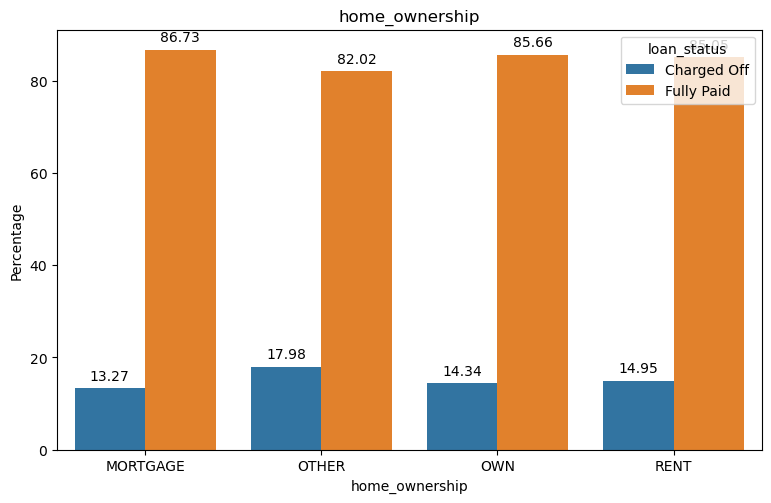

,home_ownership,loan_status,Count,Total_Count,Percentage
0,MORTGAGE,Charged Off,1855,13982,13.267058
1,MORTGAGE,Fully Paid,12127,13982,86.732942
2,OTHER,Charged Off,16,89,17.977528
3,OTHER,Fully Paid,73,89,82.022472
4,OWN,Charged Off,355,2476,14.337641
5,OWN,Fully Paid,2121,2476,85.662359
6,RENT,Charged Off,2488,16644,14.948330
7,RENT,Fully Paid,14156,16644,85.051670


In [60]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt_data = get_barplot_data(df, "home_ownership")
barplot = sns.barplot(
    x="home_ownership", y="Percentage", data=plt_data, hue="loan_status"
)
barplot = add_annotate(barplot)
plt.title("home_ownership")
plt.show()
plt_data

OTHERS can contain multiple status of the ownership of the house, so can't conclude anything 

##### Purpose

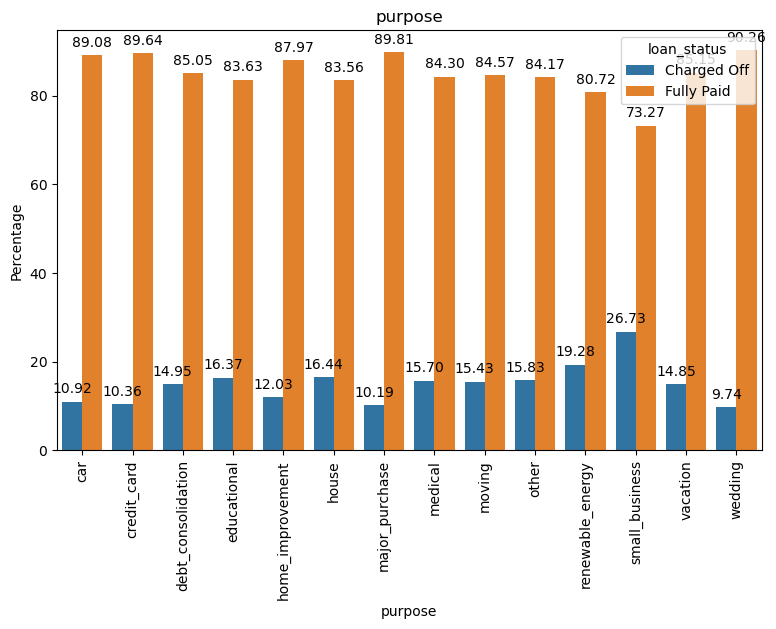

,purpose,loan_status,Count,Total_Count,Percentage
0,car,Charged Off,150,1374,10.917031
1,car,Fully Paid,1224,1374,89.082969
2,credit_card,Charged Off,450,4344,10.359116
3,credit_card,Fully Paid,3894,4344,89.640884
4,debt_consolidation,Charged Off,2329,15582,14.946733
5,debt_consolidation,Fully Paid,13253,15582,85.053267
6,educational,Charged Off,46,281,16.370107
7,educational,Fully Paid,235,281,83.629893
8,home_improvement,Charged Off,277,2303,12.027790
9,home_improvement,Fully Paid,2026,2303,87.972210


In [61]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt_data = get_barplot_data(df, "purpose")
barplot = sns.barplot(
    x="purpose", y="Percentage", data=plt_data, hue="loan_status"
)
barplot = add_annotate(barplot)
plt.title("purpose")
plt.xticks(rotation=90)
plt.show()
plt_data

Small busniness, renewable energy and educational loans have higher rate of defults

##### Address State

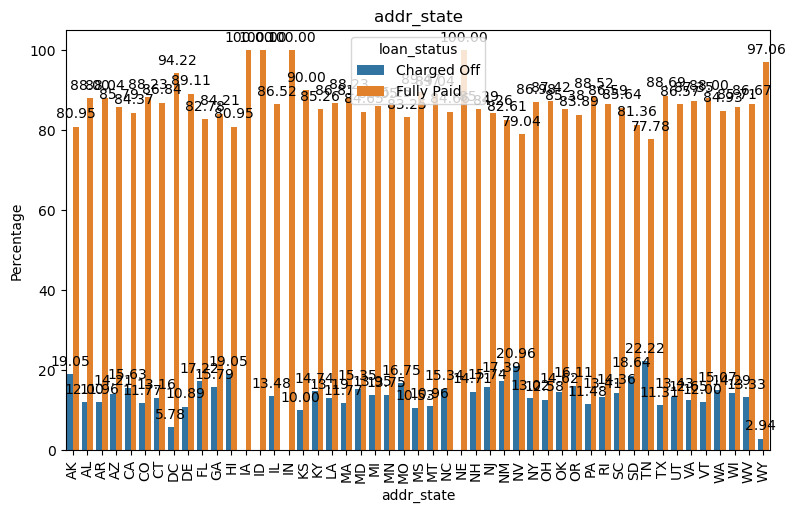

,addr_state,loan_status,Count,Total_Count,Percentage
76,TN,Charged Off,2,9,22.222222
58,NV,Charged Off,87,415,20.963855
0,AK,Charged Off,12,63,19.047619
22,HI,Charged Off,28,147,19.047619
74,SD,Charged Off,11,59,18.644068


In [62]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt_data = get_barplot_data(df, "addr_state")
barplot = sns.barplot(
    x="addr_state", y="Percentage", data=plt_data, hue="loan_status"
)
barplot = add_annotate(barplot)
plt.title("addr_state")
plt.xticks(rotation=90)
plt.show()
plt_data[plt_data["loan_status"] == "Charged Off"].sort_values(
    ["Percentage"], ascending=False
).head()

Applications from TN, NV, AK, HI and SD states are the highest risky.

##### pub_rec_bankruptcies

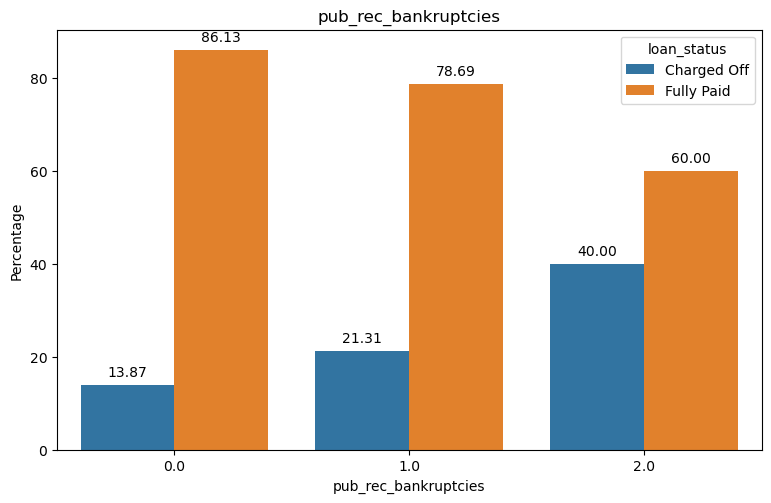

,pub_rec_bankruptcies,loan_status,Count,Total_Count,Percentage
0,0.0,Charged Off,4404,31741,13.874799
1,0.0,Fully Paid,27337,31741,86.125201
2,1.0,Charged Off,308,1445,21.314879
3,1.0,Fully Paid,1137,1445,78.685121
4,2.0,Charged Off,2,5,40.000000
5,2.0,Fully Paid,3,5,60.000000


In [63]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt_data = get_barplot_data(df, "pub_rec_bankruptcies")
barplot = sns.barplot(
    x="pub_rec_bankruptcies", y="Percentage", data=plt_data, hue="loan_status"
)
barplot = add_annotate(barplot)
plt.title("pub_rec_bankruptcies")
plt.show()
plt_data

People with higher rate of bankruptcies are more likely to be defaulters

## Action Recommanded

Bank should consider the below factors identified in Bivariate Analysis before approving a loan

* Loan Amount: Higher loan amounts are more likely to be charged off. This suggests that the bank may need to reassess its risk assessment strategies for larger loans.
* Interest Rate: Loans with higher interest rates have a higher chance of default. The bank should consider adjusting interest rates based on risk assessment to mitigate defaults.
* Instalment Amount: Higher instalment amounts correlate with higher default rates. The bank might want to review its loan terms and conditions to ensure borrowers can comfortably afford repayments.
* Annual Income: Borrowers with higher annual incomes tend to default less. The bank may consider setting income thresholds for loan eligibility or adjusting loan terms based on income levels.
* Debt-to-Income Ratio (DTI): Higher DTI ratios are associated with higher default rates. The bank should carefully evaluate borrowers' DTI ratios when assessing loan applications.
* Loan Term: Loans with longer terms, particularly 5-year terms, have higher default rates. The bank may need to adjust its lending criteria for longer-term loans or closely monitor these loans for potential defaults.
* Loan Grade: Higher loan grades show higher default percentages. The bank should revisit its grading system and potentially tighten lending criteria for higher grade loans
* Purpose of Loan: Loans for small businesses, renewable energy, and education have higher default rates. The bank might want to reassess its risk assessment for these specific loan purposes.
* State of Residence: Applications from certain states like TN, NV, AK, HI, and SD are riskier. The bank should consider regional economic factors and adjust its lending policies accordingly.
* Public Record Bankruptcies: Individuals with a history of bankruptcies are more likely to default. The bank should factor in past financial history when assessing loan applications and consider additional measures for applicants with bankruptcy records.

